# Running a single calculation

In this example, we demonstrate how to perform a single model run using the library.

First, we import the necessary classes:

In [33]:
from probabilistic_library import RunProject, RunValuesType, DistributionType, ReliabilityProject
import matplotlib.pyplot as plt
import numpy as np

Let's consider the Hunt's model for wave run-up with three output parameters:

In [34]:
from utils.models import hunt_3_outputs

We define a project using the `RunProject()` class and specify the model to be used:

In [35]:
project = RunProject()
project.model = hunt_3_outputs

project.model.print()

Model hunt_3_outputs:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z
  xi
  r_u


We define the input variables as follows:

In [36]:
project.variables["t_p"].distribution = DistributionType.log_normal
project.variables["t_p"].mean = 6
project.variables["t_p"].deviation = 2

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.log_normal
project.variables["h_s"].mean = 3
project.variables["h_s"].deviation = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.exponential
project.variables["h"].shift = 0.5
project.variables["h"].scale = 1

### Running model

It is possible to run a model assuming that the input parameters are based on one of the following:
* Mean values
* Median values
* Design values
* Values derived from a Reliability Project

These types are explained below.

#### Mean values

This is configured using `RunValuesType.mean_values`, and the model results are stored in `project.realization.output_values`. When printing the result, the first array corresponds to the input parameters and the second array to the output parameters, which were displayed by using `project.model.print()`.

In [37]:
project.settings.run_values_type = RunValuesType.mean_values

project.run()
project.realization.print()

[6, 0.3333, 3, 10, 1.5] -> [4.172, 1.443, 4.328]


#### Median values

This is set using `RunValuesType.median_values`.

In [38]:
project.settings.run_values_type = RunValuesType.median_values

project.run()
project.realization.print()

[5.692, 0.3333, 2.846, 10, 1.193] -> [4.807, 1.405, 4]


#### Design values

This is set using `RunValuesType.design_values`.

Two attributes of the input variables are relevant here: `design_quantile` and `design_factor`. The default values for these parameters are $0.5$ and $1.0$, respectively, which lead to the same results as option `median_values`.

In [39]:
project.settings.run_values_type = RunValuesType.design_values

project.run()
project.realization.print()

[5.692, 0.3333, 2.846, 10, 1.193] -> [4.807, 1.405, 4]


Below, we define the `design_quantile` and `design_factor` attributes for two input parameters: `h_crest` and `h`.

In [40]:
project.variables["h_crest"].design_quantile = 0.65
project.variables["h_crest"].design_factor = 0.95

project.variables["h"].design_quantile = 0.95
project.variables["h"].design_factor = 1.05

project.run()
project.realization.print()

[5.692, 0.3333, 2.846, 10.55, 3.329] -> [3.218, 1.405, 4]


#### Values derived from a Reliability Project

It is also possible to perform a single run using a model that has already been defined in a reliability project:

In [41]:
reliability_project = ReliabilityProject()
reliability_project.model = hunt_3_outputs

reliability_project.variables["t_p"].distribution = DistributionType.log_normal
reliability_project.variables["t_p"].mean = 6
reliability_project.variables["t_p"].deviation = 2

reliability_project.variables["tan_alpha"].distribution = DistributionType.deterministic
reliability_project.variables["tan_alpha"].mean = 0.333333

reliability_project.variables["h_s"].distribution = DistributionType.log_normal
reliability_project.variables["h_s"].mean = 3
reliability_project.variables["h_s"].deviation = 1

reliability_project.variables["h_crest"].distribution = DistributionType.log_normal
reliability_project.variables["h_crest"].mean = 10
reliability_project.variables["h_crest"].deviation = 0.05

reliability_project.variables["h"].distribution = DistributionType.exponential
reliability_project.variables["h"].shift = 0.5
reliability_project.variables["h"].scale = 1

project = RunProject()
project.model = reliability_project.model
project.settings.run_values_type = RunValuesType.mean_values

project.run()
project.realization.print()

[6, 0.3333, 3, 10, 1.5] -> [4.172, 1.443, 4.328]


### Loop

It is possible to loop over different input-parameter values:

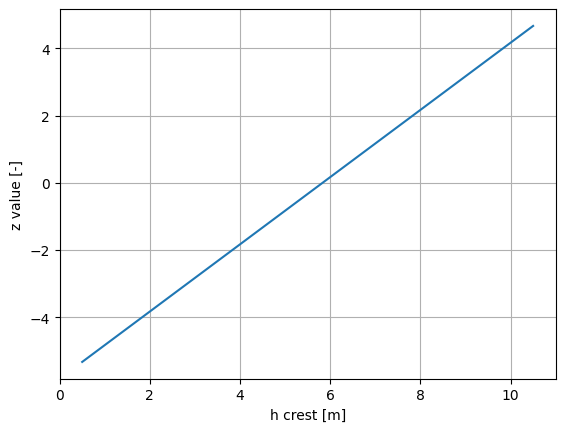

In [42]:
h_crest_values = np.arange(0.5, 11.0, 0.5)
z_value = []

for val in h_crest_values:
    reliability_project.variables["h_crest"].mean = val

    project.run()
    z_value.append(project.realization.output_values[0])

plt.figure()
plt.plot(h_crest_values, z_value)
plt.grid()
plt.xlabel("h crest [m]")
plt.ylabel("z value [-]")
plt.show()